In [1]:
!pip install opencv-python matplotlib scipy scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!git clone https://github.com/xKHUNx/CBIR_System_using_SIFT.git

%cd ./CBIR_System_using_SIFT
!git config --local core.autocrlf true

Cloning into 'CBIR_System_using_SIFT'...
remote: Enumerating objects: 36, done.
remote: Total 36 (delta 0), reused 0 (delta 0), pack-reused 36
Receiving objects: 100% (36/36), 2.29 MiB | 6.31 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/home/arch/Projects/college/IR_CS336/images_retrieval/CBIR_System_using_SIFT


/home/arch/Projects/college/IR_CS336/images_retrieval/dev/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
!git clone https://github.com/ptrxpl/dataset-animals-small.git

Cloning into 'dataset-animals-small'...
remote: Enumerating objects: 1642, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 1642 (delta 2), reused 0 (delta 0), pack-reused 1633
Receiving objects: 100% (1642/1642), 157.33 MiB | 14.96 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [6]:
!mkdir ./Images
!mkdir ./retrieval_set
!cp ./dataset-animals-small/animals/*/* ./Images

!mkdir Test_img
# move all but 300 images to the test folder
!find ./Images -type f -print0 | sort -zR | tail -zn +301 | xargs -0 -I % mv % ./Test_img

!find ./Test_img -type f -print0 | sort -zR | tail -zn +201 | xargs -0 -I % mv % ./retrieval_set

!cp ./Images/* ./retrieval_set

# rename tranning images
%cd ./Images
!ls -v . | cat -n | while read n f; do mv -n "$f" "$n.jpg"; done
%cd ..

# rename testing images
%cd ./Test_img
!ls -v . | cat -n | while read n f; do mv -n "$f" "$n.jpg"; done
%cd ..

# rename images for retrieval
%cd ./retrieval_set
!ls -v . | cat -n | while read n f; do mv -n "$f" "$n.jpg"; done
%cd ..

/home/arch/Projects/college/IR_CS336/images_retrieval/CBIR_System_using_SIFT/Images


/home/arch/Projects/college/IR_CS336/images_retrieval/dev/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/arch/Projects/college/IR_CS336/images_retrieval/CBIR_System_using_SIFT
/home/arch/Projects/college/IR_CS336/images_retrieval/CBIR_System_using_SIFT/Test_img
/home/arch/Projects/college/IR_CS336/images_retrieval/CBIR_System_using_SIFT
/home/arch/Projects/college/IR_CS336/images_retrieval/CBIR_System_using_SIFT/retrieval_set
/home/arch/Projects/college/IR_CS336/images_retrieval/CBIR_System_using_SIFT


# Trainning

In [5]:
%%writefile trainning.patch
diff --git a/computeFeatures.py b/computeFeatures.py
index aab127e..0f242f1 100644
--- a/computeFeatures.py
+++ b/computeFeatures.py
@@ -21,7 +21,7 @@ def computeFeatures(img):
     # ADD YOUR CODE BELOW THIS LINE
     
     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
-    sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.0)
+    sift = cv2.SIFT_create(contrastThreshold=0.0)
     kps, des = sift.detectAndCompute(gray, None)
 
     featvect = des
@@ -41,9 +41,9 @@ def computeFeatures_baseline(img):
     #
     #########################################################################
 
-    rhist, rbins = np.histogram(img[:,:,0], 64, normed=True)
-    ghist, gbins = np.histogram(img[:,:,1], 64, normed=True)
-    bhist, bbins = np.histogram(img[:,:,2], 64, normed=True)
+    rhist, rbins = np.histogram(img[:,:,0], 64, density=True)
+    ghist, gbins = np.histogram(img[:,:,1], 64, density=True)
+    bhist, bbins = np.histogram(img[:,:,2], 64, density=True)
     featvect = np.concatenate((rhist, ghist, bhist))
 
     return featvect 
\ No newline at end of file
diff --git a/featureExtraction.py b/featureExtraction.py
index cfd61c0..228487a 100644
--- a/featureExtraction.py
+++ b/featureExtraction.py
@@ -23,7 +23,7 @@ from computeFeatures import computeFeatures, computeFeatures_baseline
 
 # EDIT THIS TO YOUR OWN PATH IF DIFFERENT
 # dbpath = 'C:\\Users\\aquas\\Documents\\VIP\\as2\\plantdb'
-dbpath = 'C:\\Users\\Kun Shun\\Documents\\Python\\VIP\\Assignment 2\\plantdb\\train'
+dbpath = './Images'
 
 ##############################################################################
 
@@ -31,7 +31,7 @@ dbpath = 'C:\\Users\\Kun Shun\\Documents\\Python\\VIP\\Assignment 2\\plantdb\\tr
 feat = []
 base_feat = []
 
-for idx in range(500):
+for idx in range(300):
     # Load and convert image
     img = cv2.imread( os.path.join(dbpath, str(idx+1) + ".jpg") )
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
@@ -48,7 +48,7 @@ for idx in range(500):
 alldes = np.vstack(feat)
 
 k = 50
-"""
+
 # Perform K-means clustering
 alldes = np.float32(alldes)      # convert to float, required by kmeans and vq functions
 e0 = time.time()
@@ -60,10 +60,10 @@ print("Time to build {}-cluster codebook from {} images: {} seconds".format(k,al
 # Save codebook as pickle file
 pickle.dump(codebook, open("codebook.pkl", "wb"))
 
-"""
+
 
 # Load cookbook
-codebook = pickle.load(open("codebook.pkl", "rb"))
+# codebook = pickle.load(open("codebook.pkl", "rb"))
 
 ##############################################################################
 
@@ -80,7 +80,7 @@ bow = []
 # Get label for each image, and put into a histogram (BoW)
 for f in feat:
     code, distortion = vq(f, codebook)
-    bow_hist, _ = np.histogram(code, k, normed=True)
+    bow_hist, _ = np.histogram(code, k, density=True)
     bow.append(bow_hist)
     
 # Stack them together


Writing trainning.patch


In [9]:
%%writefile retrieval.patch
diff --git a/computeFeatures.py b/computeFeatures.py
index aab127e..0f242f1 100644
--- a/computeFeatures.py
+++ b/computeFeatures.py
@@ -21,7 +21,7 @@ def computeFeatures(img):
     # ADD YOUR CODE BELOW THIS LINE
     
     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
-    sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.0)
+    sift = cv2.SIFT_create(contrastThreshold=0.0)
     kps, des = sift.detectAndCompute(gray, None)
 
     featvect = des
@@ -41,9 +41,9 @@ def computeFeatures_baseline(img):
     #
     #########################################################################
 
-    rhist, rbins = np.histogram(img[:,:,0], 64, normed=True)
-    ghist, gbins = np.histogram(img[:,:,1], 64, normed=True)
-    bhist, bbins = np.histogram(img[:,:,2], 64, normed=True)
+    rhist, rbins = np.histogram(img[:,:,0], 64, density=True)
+    ghist, gbins = np.histogram(img[:,:,1], 64, density=True)
+    bhist, bbins = np.histogram(img[:,:,2], 64, density=True)
     featvect = np.concatenate((rhist, ghist, bhist))
 
     return featvect 
\ No newline at end of file
diff --git a/featureExtraction.py b/featureExtraction.py
index cfd61c0..57916c1 100644
--- a/featureExtraction.py
+++ b/featureExtraction.py
@@ -23,7 +23,7 @@ from computeFeatures import computeFeatures, computeFeatures_baseline
 
 # EDIT THIS TO YOUR OWN PATH IF DIFFERENT
 # dbpath = 'C:\\Users\\aquas\\Documents\\VIP\\as2\\plantdb'
-dbpath = 'C:\\Users\\Kun Shun\\Documents\\Python\\VIP\\Assignment 2\\plantdb\\train'
+dbpath = './retrieval_set'
 
 ##############################################################################
 
@@ -31,7 +31,7 @@ dbpath = 'C:\\Users\\Kun Shun\\Documents\\Python\\VIP\\Assignment 2\\plantdb\\tr
 feat = []
 base_feat = []
 
-for idx in range(500):
+for idx in range(300):
     # Load and convert image
     img = cv2.imread( os.path.join(dbpath, str(idx+1) + ".jpg") )
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
@@ -80,7 +80,7 @@ bow = []
 # Get label for each image, and put into a histogram (BoW)
 for f in feat:
     code, distortion = vq(f, codebook)
-    bow_hist, _ = np.histogram(code, k, normed=True)
+    bow_hist, _ = np.histogram(code, k, density=True)
     bow.append(bow_hist)
     
 # Stack them together


Overwriting retrieval.patch


In [3]:
# apply patch for trainning
!git apply trainning.patch

In [4]:
# create codebook
!python ./featureExtraction.py

Extracting features for image #0
Extracting features for image #1
Extracting features for image #2
Extracting features for image #3
Extracting features for image #4
Extracting features for image #5
Extracting features for image #6
Extracting features for image #7
Extracting features for image #8
Extracting features for image #9
Extracting features for image #10
Extracting features for image #11
Extracting features for image #12
Extracting features for image #13
Extracting features for image #14
Extracting features for image #15
Extracting features for image #16
Extracting features for image #17
Extracting features for image #18
Extracting features for image #19
Extracting features for image #20
Extracting features for image #21
Extracting features for image #22
Extracting features for image #23
Extracting features for image #24
Extracting features for image #25
Extracting features for image #26
Extracting features for image #27
Extracting features for image #28
Extracting features for 

In [7]:
# revert patch
!git apply -R trainning.patch

# Image Retrieval

In [14]:
# apply patch for retrieval
!git apply retrieval.patch

In [2]:
# %cd ./CBIR_System_using_SIFT

/home/arch/Projects/college/IR_CS336/images_retrieval/CBIR_System_using_SIFT


/home/arch/Projects/college/IR_CS336/images_retrieval/dev/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [45]:
# extract features on retrieval set
!python ./featureExtraction.py

Extracting features for image #0
Extracting features for image #1
Extracting features for image #2
Extracting features for image #3
Extracting features for image #4
Extracting features for image #5
Extracting features for image #6
Extracting features for image #7
Extracting features for image #8
Extracting features for image #9
Extracting features for image #10
Extracting features for image #11
Extracting features for image #12
Extracting features for image #13
Extracting features for image #14
Extracting features for image #15
Extracting features for image #16
Extracting features for image #17
Extracting features for image #18
Extracting features for image #19
Extracting features for image #20
Extracting features for image #21
Extracting features for image #22
Extracting features for image #23
Extracting features for image #24
Extracting features for image #25
Extracting features for image #26
Extracting features for image #27
Extracting features for image #28
Extracting features for 

In [46]:
import os
import cv2
import numpy as np
import pickle
import sys, getopt
import matplotlib.pyplot as plt
from computeDistances import computeDistances
from scipy.cluster.vq import kmeans, vq
from computeFeatures import computeFeatures
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.spatial import distance
from sklearn.preprocessing import normalize


In [47]:
codebook = pickle.load(open("codebook.pkl", "rb"))

base = pickle.load(open("base.pkl", "rb"))

tfidf_f = pickle.load(open("tfidf.pkl", "rb"))

bow_f = pickle.load(open("bow.pkl", "rb"))
        

In [48]:
def get_vec_bow(img, codebook, k = 50):
    img = img.copy()

    fev = computeFeatures(img)

    code, distortion = vq(fev, codebook)

    bow_hist, _ = np.histogram(code, k, density=True)

    return bow_hist

def get_Tfidf(bow):
    transformer = TfidfTransformer(smooth_idf=True)
    transformer.fit(bow)
    
    def get_vec_Tfidf(img, codebook, k = 50):
        nonlocal transformer

        bow_hist = get_vec_bow(img, codebook,k)

        t = transformer.transform([bow_hist]).toarray()
        
        t = normalize(t, norm='l2', axis=1)

        return t[0]
    
    return get_vec_Tfidf
        
get_vec_tfidf = get_Tfidf(bow_f)

In [49]:
def get_topk(query, features, k=1):
    dist = distance.cdist([query], features, 'cosine')[0]
    print(dist.min())

    return dist.argsort()[:k]

def search_by_img_tfidf(query_img_path, top=1):
    img = cv2.imread(query_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.axis("off")
    plt.title("query")
    plt.imshow(img)
    
    fv = get_vec_tfidf(img, codebook)

    return get_topk(fv, tfidf_f, top)

def search_by_img_bow(query_img_path, top=1):
    img = cv2.imread(query_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.axis("off")
    plt.title("query")
    plt.imshow(img)
    
    fv = get_vec_bow(img, codebook)


    return get_topk(fv, bow_f, top)

def display_results(img_ids):
    imgs = []
    f, axarr = plt.subplots(1,len(img_ids))

    for i, idx in enumerate(img_ids):
        img = cv2.imread(os.path.join("./retrieval_set", str(idx + 1) + ".jpg"))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axarr[i].set_title("result " + str(i))
        axarr[i].axis("off")
        axarr[i].imshow(img)

In [50]:
plt.rcParams["figure.figsize"] = (15,2)

0.040033574934366656
[1370 1366  185 1381 1037]


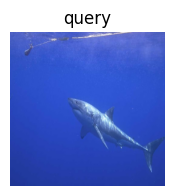

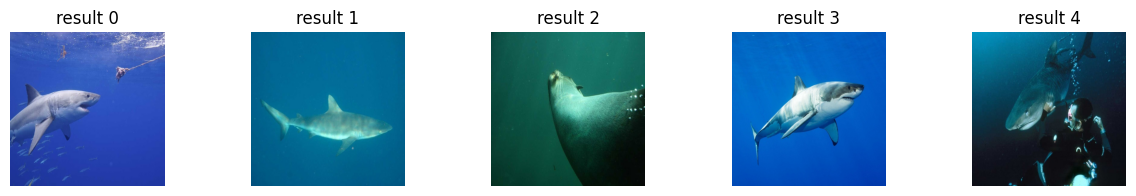

In [51]:
res = search_by_img_tfidf("./Test_img/15.jpg",top=5)
print(res)
display_results(res)

0.015510169517712336
[ 818 1267  130  213  617]


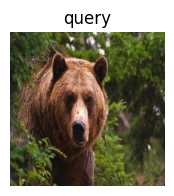

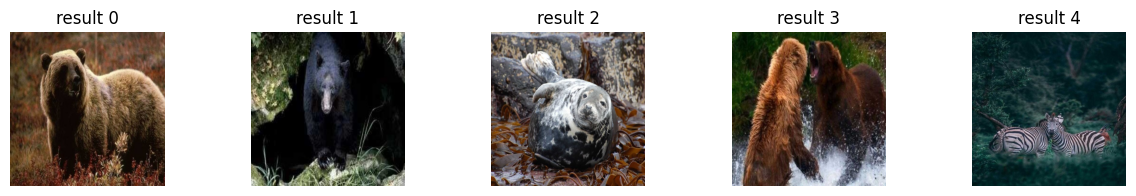

In [52]:
res = search_by_img_tfidf("./Test_img/13.jpg",top=5)
print(res)
display_results(res)

0.0075636583027534066
[ 449   89 1393  439   98]


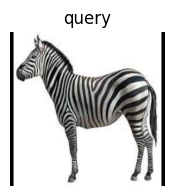

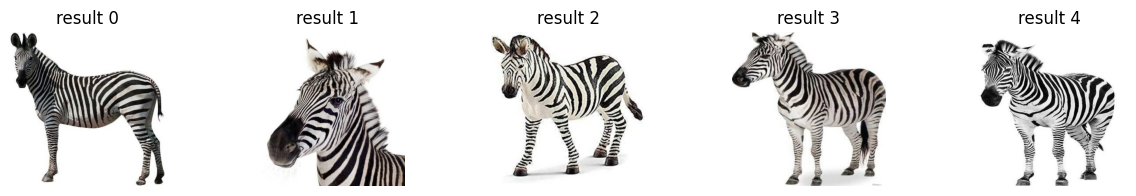

In [53]:
res = search_by_img_tfidf("./Test_img/49.jpg",top=5)
print(res)
display_results(res)

0.021845322421625957
[1008  666  634  497  579]


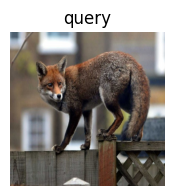

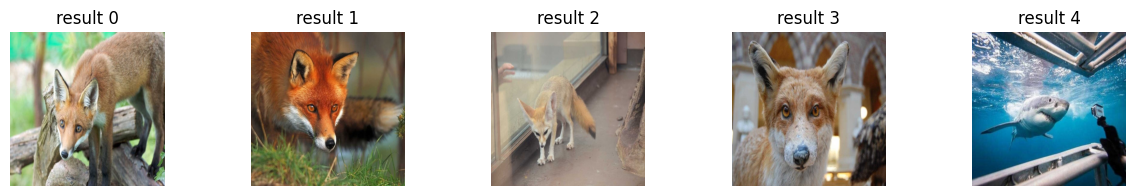

In [54]:
res = search_by_img_tfidf("./Test_img/69.jpg",top=5)
print(res)
display_results(res)

0.015510169517712336
[ 818 1267  130  213  617]


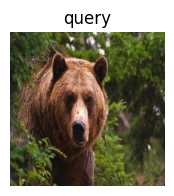

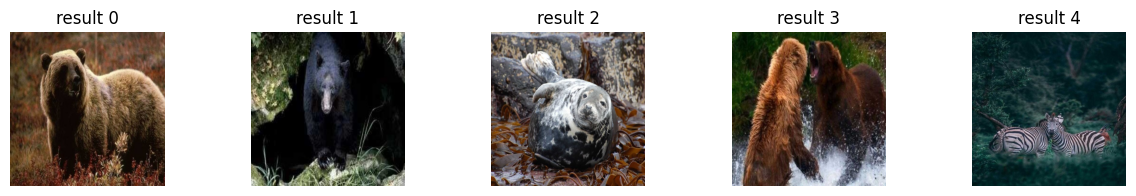

In [55]:
res = search_by_img_tfidf("./Test_img/13.jpg",top=5)
print(res)
display_results(res)

0.04112719504694928
[522  23 131 448 171]


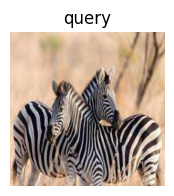

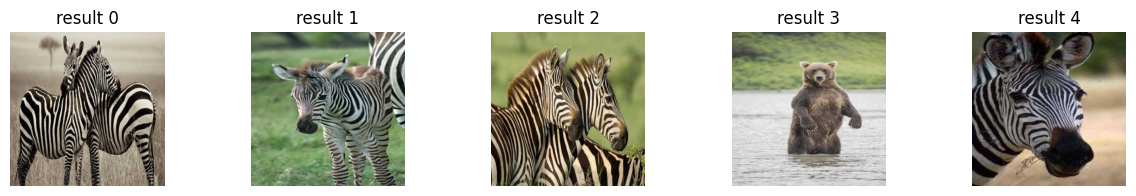

In [56]:
res = search_by_img_tfidf("./Test_img/4.jpg",top=5)
print(res)
display_results(res)